In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import pickle
import os


# NB this function has to remain in the notebook for it to work properly
# Plot training loss, validation loss, and accuracy on separate subplots, along with displaying hyperparameters
def plot(metrics, param_list, pathname, save=True, ylim=None):

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    ax1.plot(metrics['training_losses'], label='Training Loss', color='blue')
    ax1.plot(metrics['validation_losses'], label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss over Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    if ylim is not None:
        
        ax1.set_ylim(ylim)
        
    else:
        
        ax1.set_ylim(0, metrics['training_losses'][0] + 5)
        
    ax1.grid(True)
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax2.plot(metrics['accuracies'], label='Accuracy', color='green')
    ax2.plot(metrics['f1s'], label='F1 Score', color='blue')
    ax2.plot(metrics['precisions'], label='Precision', color='red')
    ax2.plot(metrics['recalls'], label='Recall', color='orange')
    ax2.set_title('Metrics over epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Value')
    ax2.legend()
    ax2.grid(True)
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    minutes = metrics['train_time'].seconds // 60

    seconds = metrics['train_time'].seconds % 60

    train_time_str = f"Training time: {minutes:02d}m {seconds:02d}s"

    info = []
    info.append(train_time_str)
        
    try:
        
        info.append(f"Number of training images: {metrics['num_training_images']:.0f}")
        
    except:
        
        print("Error with num_training_images")
 
    info.append(f"Best accuracy: {max(metrics['accuracies']):.2f}")
    info.append(f"Best F1 Score: {max(metrics['f1s']):.2f}")
    info.append(f"Best Precision: {max(metrics['precisions']):.2f}")
    info.append(f"Best Recall: {max(metrics['recalls']):.2f}")
    info.append(f"Epoch with smallest validation loss: {metrics['validation_losses'].index(min(metrics['validation_losses'])):.0f}")
    info.append("\n\n")

    # Nasty hack using globals() to get variable names automatically
    for param in param_list:
        
        for name, value in globals().items():
            
            if value is param and name not in [info_line.split(":")[0] for info_line in info]:
                
                info.append(f"{name}: {value}")
    
    info_text = "\n".join(info)
    
    fig.text(0.5, 0.02, info_text, ha='center', va='top', wrap=True, fontsize=10)

    if save:
        
        # Save the fig and the lists of values
        current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
        
        name = f"plot_{current_time}"
        
        with open(f'{pathname}/{name}.pkl', 'wb') as file:
            
            pickle.dump(metrics, file)
        
        plt.savefig(f'{pathname}/{name}.png', bbox_inches='tight')
    
    plt.show()
    
    return

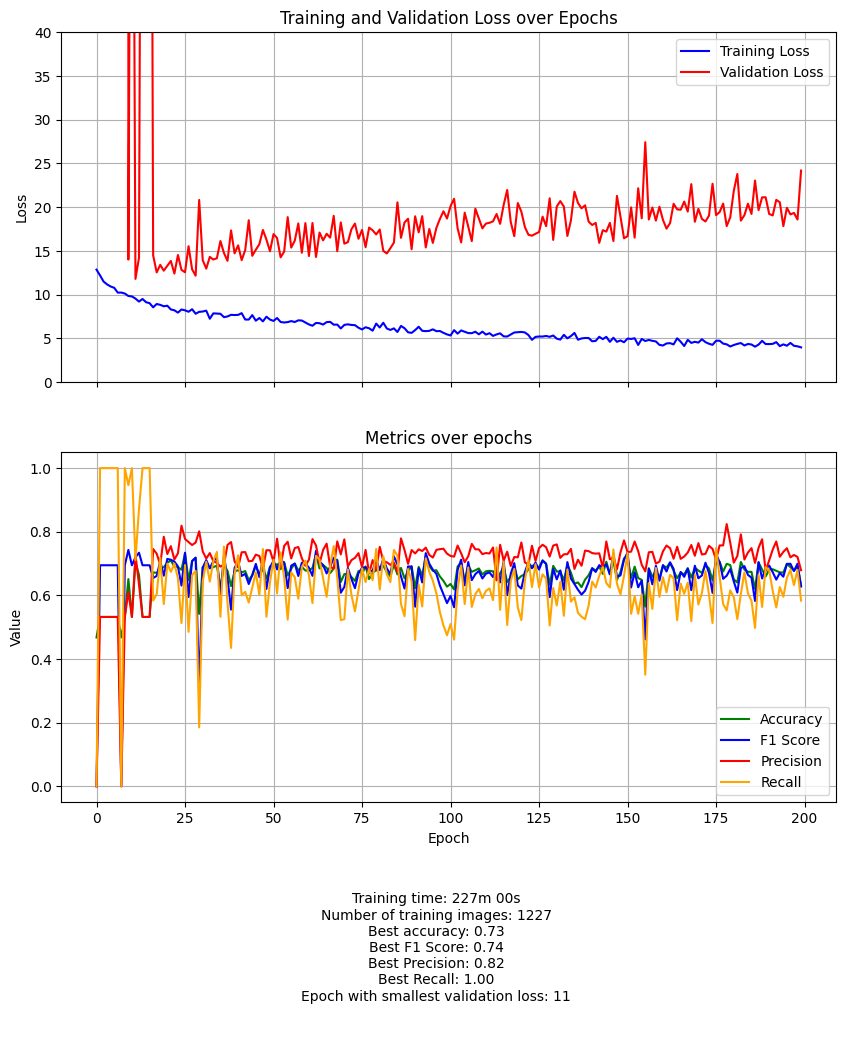

In [10]:
pickle_pathname = "/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/figs-of-interest/05-03-2025_hcampus_large_pointnet_lr0p0001/plot_2025-03-05_22-10-14.pkl"

with open(pickle_pathname, 'rb') as file:
    
    metrics = pickle.load(file)
    
plot(metrics, [], os.path.basename(os.path.dirname(pickle_pathname)), save=False, ylim=(0,40))